# Wrangling & Analyzing WeRateDogs Twitter Data

Project Performed by: Amrut Deshpande
Dated: 02/17/2018

### Introduction

The task given for the project is to gather, access and clean the WeRateDogs Twitter data. Mainly,the aim is to wrangle the WeRateDogs Twitter data to create descriptive statistical analyses which are essential for the inference of this data and also create some smooth visualizations. Although the data contains very basic tweet information that comes in JSON format, my main bridge is that the Twitter archive is great.

To be successful i need to gather the right data considering the guidelines, access the quality and tidyness, analyse the data statistically and finally present visualizations for inference.

In [1]:
#import libraries for data wrangling

import pandas as pd
import numpy as np
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
import csv
import sys
import time
import datetime
import timeit
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Gathering data

In [40]:
# Reading the twitter_archive_enhanced.csv file and setting it as a dataframe called wrd.

wrd = pd.read_csv("twitter-archive-enhanced.csv")
wrd.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# To download the dog image prediction files 
# from the Udacity server programmatically using Request library

import os
import requests

# Saving it to a file

images_folder = 'image_predictions'
if not os.path.exists(images_folder):
    os.makedirs(images_folder)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

result = requests.get(url)
result

with open(os.path.join(images_folder,
                      url.split('/')[-1]), mode='wb') as file:
    file.write(result.content)

In [4]:
#opening the tsv file

imagespread = pd.read_table('image_predictions/image-predictions.tsv', sep='\t')

In [5]:
imagespread.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file. 

In [6]:
#Importing the required libraries

import tweepy
from tweepy import OAuthHandler
import json
import csv
import sys
import os
import time


# the authentication 

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, 
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

In [7]:
#Twitter Query using tweet_id information from the wrd.

tids = list(wrd.tweet_id)

tdata = {}

for tweet in tids:
    try:
        tweet_status = api.get_status(tweet,
                                      wait_on_rate_limit=True, 
                                      wait_on_rate_limit_notify=True)
        tdata[str(tweet)] = tweet_status._json
    except: 
        print("Error for: " + str(tweet))

Error for: 888202515573088257
Error for: 873697596434513921
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 842892208864923648
Error for: 837012587749474308
Error for: 827228250799742977
Error for: 802247111496568832
Error for: 775096608509886464
Rate limit reached. Sleeping for: 702
Rate limit reached. Sleeping for: 702


In [8]:
#writing JSON data to text file

import json

with open('tweet_json.txt', 'w') as outfile:  
    json.dump(tdata, outfile, 
              sort_keys = True,
              indent=4,
              ensure_ascii = False)

In [9]:
tweet_wrd = pd.read_json('tweet_json.txt',orient='index')


In [10]:
tweet_wrd.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2528,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,518,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,130,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,126,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,46,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,304,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,143,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,108,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,40,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ..."


## Assess Data

After completing the gathering of each of the three dataframe, my task is to assess them visually and programmatically for quality and tidiness issues and list out each of it. 
To fully assess the entire dataset requires, we need exceptional effort so i am consering only a subset of its issues i.e eight quality issues and two tidiness issues.

##### WeRateDogs tweet data 

In [11]:
wrd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
wrd.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
wrd.name.value_counts()

None            745
a                55
Charlie          12
Cooper           11
Oliver           11
Lucy             11
Penny            10
Lola             10
Tucker           10
Winston           9
Bo                9
the               8
Sadie             8
Toby              7
Buddy             7
Bailey            7
an                7
Daisy             7
Rusty             6
Leo               6
Jax               6
Koda              6
Scout             6
Stanley           6
Milo              6
Oscar             6
Dave              6
Bella             6
Jack              6
Phil              5
               ... 
Ruffles           1
Oddie             1
Wiggles           1
Kallie            1
Henry             1
Beemo             1
Spencer           1
Harnold           1
Kathmandu         1
Saydee            1
Cleopatricia      1
Crouton           1
DayZ              1
Trip              1
Wesley            1
Spark             1
Halo              1
Toffee            1
Sailor            1


In [14]:
wrd[wrd.rating_denominator==170]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


###### Image predictions data 

In [15]:
imagespread.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
imagespread.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
imagespread.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
imagespread.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
web_site                      19
Cardigan                      19
Maltese_dog                   18
beagle                        18
teddy                         18
Shetland_sheepdog             18
Eskimo_dog                    18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

###### JSON tweet data 

In [19]:
tweet_wrd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2346 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2346 non-null datetime64[ns]
entities                         2346 non-null object
extended_entities                1824 non-null object
favorite_count                   2346 non-null int64
favorited                        2346 non-null int64
geo                              0 non-null float64
id                               2346 non-null int64
id_str                           2346 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  23

In [20]:
tweet_wrd.describe()

,contributors,coordinates,favorite_count,favorited,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,truncated
count,0.0,0.0,2346.000000,2346.0,0.0,2.346000e+03,2.346000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,2346.000000,2207.0,2207.0,2.800000e+01,2.800000e+01,2346.000000,2346.0,2346.000000
mean,NaN,NaN,8118.161125,0.0,NaN,7.423380e+17,7.423380e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,0.013214,0.0,0.0,8.214171e+17,8.214171e+17,3065.683717,0.0,0.105286
std,NaN,NaN,12203.194964,0.0,NaN,6.835504e+16,6.835504e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,0.114214,0.0,0.0,5.606440e+16,5.606440e+16,5090.344465,0.0,0.306986
min,NaN,NaN,0.000000,0.0,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.000000,0.0,0.0,7.061659e+17,7.061659e+17,0.000000,0.0,0.000000
25%,NaN,NaN,1410.250000,0.0,NaN,6.783824e+17,6.783824e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,0.000000,0.0,0.0,7.942973e+17,7.942973e+17,612.250000,0.0,0.000000
50%,NaN,NaN,3566.500000,0.0,NaN,7.189556e+17,7.189556e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,0.000000,0.0,0.0,8.365177e+17,8.365177e+17,1434.000000,0.0,0.000000
75%,NaN,NaN,10048.250000,0.0,NaN,7.987010e+17,7.987010e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,0.000000,0.0,0.0,8.676130e+17,8.676130e+17,3575.500000,0.0,0.000000
max,NaN,NaN,144162.000000,0.0,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,1.000000,0.0,0.0,8.860534e+17,8.860534e+17,78209.000000,0.0,1.000000


In [21]:
tweet_wrd.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2528,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,518,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,130,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,126,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,46,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,304,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,143,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,108,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,40,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ..."


In [22]:
tweet_wrd.favorite_count.value_counts()

0        171
516        4
2065       4
657        3
3233       3
195        3
1481       3
1512       3
462        3
2995       3
3505       3
2433       3
843        3
534        2
443        2
2339       2
1073       2
768        2
1641       2
5720       2
2660       2
2783       2
322        2
1119       2
2204       2
2642       2
8181       2
7387       2
2771       2
340        2
        ... 
2636       1
10826      1
6700       1
541        1
6686       1
543        1
14880      1
8737       1
10786      1
547        1
549        1
551        1
6696       1
14890      1
4651       1
4659       1
585        1
27188      1
31286      1
49719      1
12857      1
19002      1
12859      1
573        1
579        1
2628       1
581        1
2630       1
2632       1
10200      1
Name: favorite_count, Length: 2020, dtype: int64

### Quality Issues 

As suggested in the project motivation, I will only be considering original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.

#### Removing the  retweets

The field that provides the number of times this tweet was retweeted is retweet_count. Firstly, we need to remove this as this data won't help us in analysing the right trends. Also, this keeps varying as people keep retweeting over time.

Further, i am not considering the tweet which was retweeted from the original tweet. Two fields are significant. In the data, the retweeted_status contains the source tweet. The presence or the absence of this field can be used to identify tweets that are retweets. Additionaly, the retweet_count is the count of the retweets of the source tweet, not this tweet.

I will first isolate all rows in the retweeted_status column that have a value and delete it from the dataframe which will remove tweets that are a retweet from the dataframe.

I shall now remove the selected quality issues of these 3 data tables individually

##### The Tweet Dataframe table: wrd 

1. retweets data records should be excluded
2. source column is unreadable
3. mis spelt or mis labeled dog names. cross reference with names column
4. check duplicate values from all columns
5. unnecessary columns for analysis
6. Incorrect values are extracted from Rating numerator and denominator columns.
 

##### The image predictions table : imagespread 

1. no consistency in starting letter of p1, p2, p3 columns 
2. Missing observations ( 2075 instead of 2356 )
3. Remove '_' from p1,p2,p3 columns

#### The tweet table: tweet_wrd 

1. id name is different and has no match with previous tweet_id column
2. retweeted_status records need to be excluded

### Tidyness Issues 

##### The Tweet Dataframe table: wrd 

 1. date and timestamp data type is object
 2. tweet_id column datatype is integer
 3. single column for multiple dog stages

#### The tweet table: tweet_wrd 

1. convert id column to  string
2. Consolidate the tweet_wrd table into the arranged columns

## Clean Data

In [41]:
# Create copy of each dataframe and retain original files
wrd_clean=wrd.copy()
imagespread_clean=imagespread.copy()
tweet_wrd_clean=tweet_wrd.copy()

### Quality Issues 

### wrd tweet data 

#### Define

Checking for retweet records-retweet_staus in the data

#### Code

In [42]:
wrd_clean[wrd_clean.retweeted_status_id.notnull()==True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [43]:
# Removing the retweet information from wrd tweet dataframe
wrd_clean.drop(wrd_clean[wrd_clean['retweeted_status_id'].notnull()==True].index, inplace=True)

In [44]:
# Delete all columns pf retweet data
wrd_clean=wrd_clean.drop('retweeted_status_id', 1)
wrd_clean=wrd_clean.drop('retweeted_status_user_id', 1)
wrd_clean=wrd_clean.drop('retweeted_status_timestamp', 1)

#### Test 

In [45]:
# columns retained in wrd_clean tweet data
wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


#### Define 

Cleaning the content of source column to make it readable

#### Code

In [46]:
import re
wrd_clean.source=wrd_clean.source.apply(lambda x: re.findall(r'>(.*)<', x)[0])

#### Test 

In [47]:
wrd_clean.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
385,826848821049180160,NaN,NaN,2017-02-01 17:44:55 +0000,Twitter for iPhone,This is Cupid. He was found in the trash. Now ...,https://twitter.com/dog_rates/status/826848821...,13,10,Cupid,doggo,None,None,None


#### Define 

replacing faulty or missed names to a corrected name

#### Code

In [48]:
# replace missing and faulty names with None value
wrd_clean['name'].replace('the', 'None', inplace=True)
wrd_clean['name'].replace("all",'None', inplace=True) 
wrd_clean['name'].replace("this",'None', inplace=True) 
wrd_clean['name'].replace("very",'None', inplace=True) 
wrd_clean['name'].replace("life",'None', inplace=True)
wrd_clean['name'].replace("an",'None', inplace=True)
wrd_clean['name'].replace("my",'None', inplace=True)
wrd_clean['name'].replace("O","None", inplace=True)
wrd_clean['name'].replace("light",'None', inplace=True)
wrd_clean['name'].replace("by",'None', inplace=True)
wrd_clean['name'].replace("actually",'None', inplace=True)
wrd_clean['name'].replace("just",'None', inplace=True)
wrd_clean['name'].replace("mad",'None', inplace=True) 
wrd_clean['name'].replace("not",'None', inplace=True)
wrd_clean['name'].replace("one",'None', inplace=True)
wrd_clean['name'].replace("getting",'None', inplace=True) 
wrd_clean['name'].replace("infuriating",'None', inplace=True) 
wrd_clean['name'].replace("old",'None', inplace=True) 
wrd_clean['name'].replace("quite","None", inplace=True)
wrd_clean['name'].replace("such","None", inplace=True)
wrd_clean['name'].replace("a",'None', inplace=True)

In [49]:
wrd_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### Define 

Getting unique elements from all the columns by removing duplicates

#### Code

In [50]:
wrd_clean.apply(lambda x: len(x.unique()))

tweet_id                 2175
in_reply_to_status_id      78
in_reply_to_user_id        32
timestamp                2175
source                      4
text                     2175
expanded_urls            2117
rating_numerator           40
rating_denominator         18
name                      935
doggo                       2
floofer                     2
pupper                      2
puppo                       2
dtype: int64

#### Test 

In [51]:
wrd_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### Define 

Remove unwanted columns from wrd tweet data for efficient analysis

#### Code

In [52]:
wrd_clean.drop(['expanded_urls','in_reply_to_user_id', 'in_reply_to_status_id'], 1, inplace=True)

#### Test 

In [53]:
wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


In [54]:
wrd_clean.head(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


#### Define

Extracting right values for rating numerator and denominator columns

In [57]:
# Extracting and storing ratings from tweet 
extract=wrd_clean['text'].str.findall(r'(\d+(\.\d+)|(\d+))\/(\d+)')

# Checking ratings datatype
type(extract.iloc[0])

# Converte rating numerator datatype to float
wrd_clean.rating_numerator=wrd_clean.rating_numerator.astype(float)

#Verifying the change in ratings value before and after extraction
print(wrd_clean[wrd_clean.tweet_id== 883482846933004288].rating_numerator)

for i, row in wrd_clean.iterrows():
    wrd_clean.set_value(i,'rating_numerator', float((extract[i][-1][0])))
    wrd_clean.set_value(i,'rating_denominator', float((extract[i][-1][3])))
        
print(wrd_clean[wrd_clean.tweet_id== 883482846933004288].rating_numerator)

45    5.0
Name: rating_numerator, dtype: float64
45    13.5
Name: rating_numerator, dtype: float64


#### Test 

In [58]:
wrd_clean.info()
wrd_clean.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 283.9+ KB


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
733,781308096455073793,2016-09-29 01:42:20 +0000,Vine - Make a Scene,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",12.0,10,None,doggo,None,pupper,None
1688,681523177663676416,2015-12-28 17:12:42 +0000,Twitter for iPhone,This is Carly. She's actually 2 dogs fused tog...,12.0,10,Carly,None,None,None,None
635,793601777308463104,2016-11-01 23:53:02 +0000,Twitter for iPhone,This is Dobby. I can't stop looking at her fee...,12.0,10,Dobby,None,None,None,None
977,750011400160841729,2016-07-04 17:00:26 +0000,TweetDeck,Meet Piper. She's an airport doggo. Please ret...,11.0,10,Piper,doggo,None,None,None
1329,705898680587526145,2016-03-04 23:32:15 +0000,Twitter for iPhone,Meet Max. He's a Fallopian Cephalopuff. Eyes a...,10.0,10,Max,None,None,None,None
67,879376492567855104,2017-06-26 16:31:08 +0000,Twitter for iPhone,This is Jack AKA Stephen Furry. You're not sco...,12.0,10,Jack,None,None,None,None
233,847842811428974592,2017-03-31 16:07:33 +0000,Twitter for iPhone,"This is Rontu. He is described as a pal, cuddl...",12.0,10,Rontu,None,None,None,None
1070,740359016048689152,2016-06-08 01:45:19 +0000,Twitter for iPhone,This is Chase. He's in a predicament. 9/10 hel...,9.0,10,Chase,None,None,None,None
1485,693155686491000832,2016-01-29 19:36:08 +0000,Twitter for iPhone,This is Dunkin. He can only see when he's wet ...,12.0,10,Dunkin,None,None,None,None
1662,682962037429899265,2016-01-01 16:30:13 +0000,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is i...,10.0,10,Darrel,None,None,None,None


### imagespread images data 

#### Define 

Capitalize the starting letter of first word in p1, p2 and p3 columns

#### Code 

In [59]:
imagespread_clean.p1=imagespread_clean.p1.str.capitalize()
imagespread_clean.p2=imagespread_clean.p2.str.capitalize()
imagespread_clean.p3=imagespread_clean.p3.str.capitalize()


#### Test 

In [60]:
imagespread_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_swiss_mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box_turtle,0.933012,False,Mud_turtle,0.045885,False,Terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan_mastiff,0.058279,True,Fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping_cart,0.962465,False,Shopping_basket,0.014594,False,Golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature_poodle,0.201493,True,Komondor,0.192305,True,Soft-coated_wheaten_terrier,0.082086,True


####  Define 

Replace the ("_") in the p1,p2,p3 columns

#### Code 

In [61]:
imagespread_clean['p1'] = imagespread_clean['p1'].str.replace('_', ' ')
imagespread_clean['p2'] = imagespread_clean['p2'].str.replace('_', ' ')
imagespread_clean['p3'] = imagespread_clean['p3'].str.replace('_', ' ')

#### Test 

In [62]:
imagespread_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese mountain dog,0.651137,True,English springer,0.263788,True,Greater swiss mountain dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box turtle,0.933012,False,Mud turtle,0.045885,False,Terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan mastiff,0.058279,True,Fur coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping cart,0.962465,False,Shopping basket,0.014594,False,Golden retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature poodle,0.201493,True,Komondor,0.192305,True,Soft-coated wheaten terrier,0.082086,True


In [63]:
imagespread_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### tweet_wrd dataframe 

#### Define 

Convert id column to tweet_id column to match the other two columns id

#### Code 

In [64]:
tweet_wrd_clean.rename(columns= {'id': 'tweet_id'}, inplace=True)

#### Test 

In [65]:
tweet_wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2346 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2346 non-null datetime64[ns]
entities                         2346 non-null object
extended_entities                1824 non-null object
favorite_count                   2346 non-null int64
favorited                        2346 non-null int64
geo                              0 non-null float64
tweet_id                         2346 non-null int64
id_str                           2346 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  23

### Tidyness issues 

### wrd tweet data 

#### Define 

Convert tweet_id into panda objects and rating numerator and denominator to float as ratings can be float as well

#### Code 

In [66]:
wrd_clean.tweet_id=wrd_clean.tweet_id.astype('str')
wrd_clean.rating_denominator=wrd_clean.rating_denominator.astype(float)
wrd_clean.rating_numerator=wrd_clean.rating_numerator.astype(float)

#### Test 

In [67]:
wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: float64(2), object(9)
memory usage: 283.9+ KB


#### Define 

Convert date and time columns to datetime objects

#### Code 

Convert timestamp column from string to datetime object and split into time and date
also, Convert date and time columns to datetime objects to ease calculations 

In [68]:
from datetime import timedelta

wrd_clean.timestamp= pd.to_datetime(wrd_clean.timestamp)

# Extract date and time information from timestamp column.
wrd_clean['date']= wrd_clean.timestamp.apply(lambda time: time.strftime('%m-%d-%Y'))
wrd_clean['time']= wrd_clean.timestamp.apply(lambda time: time.strftime('%H:%M'))

# Verify and delete timestamp column
wrd_clean=wrd_clean.drop('timestamp',1)

In [69]:
wrd_clean['date']= pd.to_datetime(wrd_clean['date'])
wrd_clean['time']= pd.to_datetime(wrd_clean['time'])

#### Test

In [70]:
wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
date                  2175 non-null datetime64[ns]
time                  2175 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(8)
memory usage: 300.9+ KB


#### Define 

Melting 'doggo', 'floofer', 'pupper', 'puppo' columns into a single stages_dog column

#### Code

In [71]:
wrd_clean['stages_dog'] = wrd[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)

wrd_clean['stages_dog'].replace("NoneNoneNoneNone","None ", inplace=True)
wrd_clean['stages_dog'].replace("doggoNoneNoneNone","doggo", inplace=True)
wrd_clean['stages_dog'].replace("NoneflooferNoneNone","floofer", inplace=True)
wrd_clean['stages_dog'].replace("NoneNonepupperNone","pupper", inplace=True)
wrd_clean['stages_dog'].replace("NoneNoneNonepuppo","puppo", inplace=True)

In [72]:
wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
date                  2175 non-null datetime64[ns]
time                  2175 non-null datetime64[ns]
stages_dog            2175 non-null object
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 317.9+ KB


In [73]:
wrd_clean.drop(['doggo',
               'floofer',
               'pupper',
               'puppo'], axis=1,inplace=True)

#### Test 

In [74]:
wrd_clean

,tweet_id,source,text,rating_numerator,rating_denominator,name,date,time,stages_dog
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,2017-08-01,2018-02-19 16:23:00,None
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,2017-08-01,2018-02-19 00:17:00,None
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,2017-07-31,2018-02-19 00:18:00,None
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,2017-07-30,2018-02-19 15:58:00,None
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,2017-07-29,2018-02-19 16:00:00,None
5,891087950875897856,Twitter for iPhone,Here we have a majestic great white breaching ...,13.0,10.0,None,2017-07-29,2018-02-19 00:08:00,None
6,890971913173991426,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10.0,Jax,2017-07-28,2018-02-19 16:27:00,None
7,890729181411237888,Twitter for iPhone,When you watch your owner call another dog a g...,13.0,10.0,None,2017-07-28,2018-02-19 00:22:00,None
8,890609185150312448,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,13.0,10.0,Zoey,2017-07-27,2018-02-19 16:25:00,None
9,890240255349198849,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,2017-07-26,2018-02-19 15:59:00,doggo


In [75]:
wrd_clean.stages_dog.value_counts()

None                    1831
pupper                   224
doggo                     75
puppo                     24
doggoNonepupperNone       10
floofer                    9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: stages_dog, dtype: int64

###  imagespread dataframe

#### Define

Converting tweet_id datatype to object to maintain consistency

#### Code 

In [76]:
imagespread_clean.tweet_id=imagespread_clean.tweet_id.astype(str)

#### Test 

In [78]:
imagespread_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [79]:
imagespread_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### tweet_wrd dataframe 

In [80]:
tweet_wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2346 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2346 non-null datetime64[ns]
entities                         2346 non-null object
extended_entities                1824 non-null object
favorite_count                   2346 non-null int64
favorited                        2346 non-null int64
geo                              0 non-null float64
tweet_id                         2346 non-null int64
id_str                           2346 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  23

#### Define 

Converting id column to tweet_id column to match the other columns

#### Code 

In [81]:
tweet_wrd_clean.rename(columns= {'id': 'tweet_id'}, inplace=True)

#### Test 

In [82]:
tweet_wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2346 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2346 non-null datetime64[ns]
entities                         2346 non-null object
extended_entities                1824 non-null object
favorite_count                   2346 non-null int64
favorited                        2346 non-null int64
geo                              0 non-null float64
tweet_id                         2346 non-null int64
id_str                           2346 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  23

#### Define 

Remove retweets data and retain only original tweets for analysis

#### Code 

In [83]:
tweet_wrd_clean[tweet_wrd_clean.retweeted_status.notnull()]
tweet_wrd_clean.drop(tweet_wrd_clean[tweet_wrd_clean.retweeted_status.notnull()].index, inplace=True)

In [84]:
tweet_wrd_clean.drop(['contributors','coordinates',
                    'entities',
                    'extended_entities','geo',
                    'id_str','in_reply_to_screen_name',
                    'in_reply_to_status_id','in_reply_to_status_id_str',
                    'in_reply_to_user_id',
                    'in_reply_to_user_id_str','is_quote_status','lang',
                    'place','possibly_sensitive','possibly_sensitive_appealable',
                    'quoted_status','quoted_status_id',
                    'quoted_status_id_str',
                    'retweeted_status','retweeted',
                    'source','truncated','user',
                    'favorited','created_at'], axis=1, inplace=True)

#### Test 

In [85]:
tweet_wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2175 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 4 columns):
favorite_count    2175 non-null int64
tweet_id          2175 non-null int64
retweet_count     2175 non-null int64
text              2175 non-null object
dtypes: int64(3), object(1)
memory usage: 85.0+ KB


#### Define 

Converting tweet_id datatype to object to maintain consistency

#### Code 

In [86]:
tweet_wrd_clean.tweet_id=tweet_wrd_clean.tweet_id.astype(str)

#### Test 

In [87]:
tweet_wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2175 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 4 columns):
favorite_count    2175 non-null int64
tweet_id          2175 non-null object
retweet_count     2175 non-null int64
text              2175 non-null object
dtypes: int64(2), object(2)
memory usage: 85.0+ KB


In [88]:
tweet_wrd_clean.head(5)

,favorite_count,tweet_id,retweet_count,text
1991-02-08 13:48:08.022790149,2528,666020888022790144,518,Here we have a Japanese Irish Setter. Lost eye...
1991-02-08 16:08:05.002620928,130,666029285002620928,47,This is a western brown Mitsubishi terrier. Up...
1991-02-08 17:16:52.701032449,126,666033412701032448,46,Here is a very happy pup. Big fan of well-main...
1991-02-08 20:17:06.329800704,304,666044226329800704,143,This is a purebred Piers Morgan. Loves to Netf...
1991-02-08 21:40:48.165822465,108,666049248165822464,40,Here we have a 1949 1st generation vulpix. Enj...


## Merge Datas 

#### Define 

Merge all three dataframes using 'tweet_id' column to form a master dataframe 'master_wrd' which can be used for effective analysis

#### Code 

In [97]:
# Using inner join to join tweet data and images dataframe and also master data and json data
master_wrd=pd.merge(wrd_clean, imagespread_clean, on='tweet_id', how='inner')
master_wrd=pd.merge(master_wrd, tweet_wrd_clean, on='tweet_id', how='inner')

#### Test 

In [98]:
master_wrd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 23 columns):
tweet_id              1300 non-null object
source                1300 non-null object
text_x                1300 non-null object
rating_numerator      1300 non-null float64
rating_denominator    1300 non-null float64
name                  1300 non-null object
date                  1300 non-null datetime64[ns]
time                  1300 non-null datetime64[ns]
stages_dog            1300 non-null object
jpg_url               1300 non-null object
img_num               1300 non-null int64
p1                    1300 non-null object
p1_conf               1300 non-null float64
p1_dog                1300 non-null bool
p2                    1300 non-null object
p2_conf               1300 non-null float64
p2_dog                1300 non-null bool
p3                    1300 non-null object
p3_conf               1300 non-null float64
p3_dog                1300 non-null bool
favorite_count     

In [99]:
master_wrd.head(20)

,tweet_id,source,text_x,rating_numerator,rating_denominator,name,date,time,stages_dog,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,text_y
0,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,2017-07-31,2018-02-19 00:18:00,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,25253,4241,This is Archie. He is a rare Norwegian Pouncin...
1,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,2017-07-30,2018-02-19 15:58:00,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,Labrador retriever,0.168086,True,Spatula,0.040836,False,42479,8798,This is Darla. She commenced a snooze mid meal...
2,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,2017-07-29,2018-02-19 16:00:00,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,English springer,0.225770,True,German short-haired pointer,0.175219,True,40641,9577,This is Franklin. He would like you to stop ca...
3,891087950875897856,Twitter for iPhone,Here we have a majestic great white breaching ...,13.0,10.0,None,2017-07-29,2018-02-19 00:08:00,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,True,Irish terrier,0.116317,True,Indian elephant,0.076902,False,20387,3178,Here we have a majestic great white breaching ...
4,890729181411237888,Twitter for iPhone,When you watch your owner call another dog a g...,13.0,10.0,None,2017-07-28,2018-02-19 00:22:00,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,...,True,Eskimo dog,0.178406,True,Pembroke,0.076507,True,66101,19277,When you watch your owner call another dog a g...
5,890609185150312448,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,13.0,10.0,Zoey,2017-07-27,2018-02-19 16:25:00,None,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,True,Irish setter,0.193054,True,Chesapeake bay retriever,0.118184,True,27990,4338,This is Zoey. She doesn't want to be one of th...
6,890006608113172480,Twitter for iPhone,This is Koda. He is a South Australian decksha...,13.0,10.0,Koda,2017-07-26,2018-02-19 00:31:00,None,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,...,True,Pomeranian,0.013884,True,Chow,0.008167,True,30872,7479,This is Koda. He is a South Australian decksha...
7,889638837579907072,Twitter for iPhone,This is Ted. He does his best. Sometimes that'...,12.0,10.0,Ted,2017-07-25,2018-02-19 00:10:00,None,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,...,True,Boxer,0.002129,True,Staffordshire bullterrier,0.001498,True,27395,4632,This is Ted. He does his best. Sometimes that'...
8,889278841981685760,Twitter for iPhone,This is Oliver. You're witnessing one of his m...,13.0,10.0,Oliver,2017-07-24,2018-02-19 00:19:00,None,https://pbs.twimg.com/ext_tw_video_thumb/88927...,...,True,Borzoi,0.194742,True,Saluki,0.027351,True,25501,5546,This is Oliver. You're witnessing one of his m...
9,888917238123831296,Twitter for iPhone,This is Jim. He found a fren. Taught him how t...,12.0,10.0,Jim,2017-07-23,2018-02-19 00:22:00,None,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,...,True,Tibetan mastiff,0.120184,True,Labrador retriever,0.105506,True,29317,4593,This is Jim. He found a fren. Taught him how t...


#### Define 

Standardize the date and time column in their respective data formats

#### Code

In [100]:
master_wrd['date'] = master_wrd['date'].apply(lambda time: time.strftime('%m-%d-%Y'))
master_wrd['time'] = master_wrd['time'].apply(lambda time: time.strftime('%H:%M'))

In [101]:
master_wrd.drop(['img_num'], axis=1, inplace=True)

#### Test 

In [102]:
master_wrd.head(10)

,tweet_id,source,text_x,rating_numerator,rating_denominator,name,date,time,stages_dog,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,text_y
0,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,07-31-2017,00:18,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,25253,4241,This is Archie. He is a rare Norwegian Pouncin...
1,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,07-30-2017,15:58,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,Labrador retriever,0.168086,True,Spatula,0.040836,False,42479,8798,This is Darla. She commenced a snooze mid meal...
2,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,07-29-2017,16:00,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,English springer,0.225770,True,German short-haired pointer,0.175219,True,40641,9577,This is Franklin. He would like you to stop ca...
3,891087950875897856,Twitter for iPhone,Here we have a majestic great white breaching ...,13.0,10.0,None,07-29-2017,00:08,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,True,Irish terrier,0.116317,True,Indian elephant,0.076902,False,20387,3178,Here we have a majestic great white breaching ...
4,890729181411237888,Twitter for iPhone,When you watch your owner call another dog a g...,13.0,10.0,None,07-28-2017,00:22,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,...,True,Eskimo dog,0.178406,True,Pembroke,0.076507,True,66101,19277,When you watch your owner call another dog a g...
5,890609185150312448,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,13.0,10.0,Zoey,07-27-2017,16:25,None,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,True,Irish setter,0.193054,True,Chesapeake bay retriever,0.118184,True,27990,4338,This is Zoey. She doesn't want to be one of th...
6,890006608113172480,Twitter for iPhone,This is Koda. He is a South Australian decksha...,13.0,10.0,Koda,07-26-2017,00:31,None,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,...,True,Pomeranian,0.013884,True,Chow,0.008167,True,30872,7479,This is Koda. He is a South Australian decksha...
7,889638837579907072,Twitter for iPhone,This is Ted. He does his best. Sometimes that'...,12.0,10.0,Ted,07-25-2017,00:10,None,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,...,True,Boxer,0.002129,True,Staffordshire bullterrier,0.001498,True,27395,4632,This is Ted. He does his best. Sometimes that'...
8,889278841981685760,Twitter for iPhone,This is Oliver. You're witnessing one of his m...,13.0,10.0,Oliver,07-24-2017,00:19,None,https://pbs.twimg.com/ext_tw_video_thumb/88927...,...,True,Borzoi,0.194742,True,Saluki,0.027351,True,25501,5546,This is Oliver. You're witnessing one of his m...
9,888917238123831296,Twitter for iPhone,This is Jim. He found a fren. Taught him how t...,12.0,10.0,Jim,07-23-2017,00:22,None,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,...,True,Tibetan mastiff,0.120184,True,Labrador retriever,0.105506,True,29317,4593,This is Jim. He found a fren. Taught him how t...


In [103]:
master_wrd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 22 columns):
tweet_id              1300 non-null object
source                1300 non-null object
text_x                1300 non-null object
rating_numerator      1300 non-null float64
rating_denominator    1300 non-null float64
name                  1300 non-null object
date                  1300 non-null object
time                  1300 non-null object
stages_dog            1300 non-null object
jpg_url               1300 non-null object
p1                    1300 non-null object
p1_conf               1300 non-null float64
p1_dog                1300 non-null bool
p2                    1300 non-null object
p2_conf               1300 non-null float64
p2_dog                1300 non-null bool
p3                    1300 non-null object
p3_conf               1300 non-null float64
p3_dog                1300 non-null bool
favorite_count        1300 non-null int64
retweet_count         1300 non-null

## Storing Data 

In [104]:
master_wrd.to_csv('twitter_archive_master.csv', index= False, encoding='utf-8')
master_wrd= pd.read_csv('twitter_archive_master.csv')

In [105]:
master_wrd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 22 columns):
tweet_id              1300 non-null int64
source                1300 non-null object
text_x                1300 non-null object
rating_numerator      1300 non-null float64
rating_denominator    1300 non-null float64
name                  1300 non-null object
date                  1300 non-null object
time                  1300 non-null object
stages_dog            1300 non-null object
jpg_url               1300 non-null object
p1                    1300 non-null object
p1_conf               1300 non-null float64
p1_dog                1300 non-null bool
p2                    1300 non-null object
p2_conf               1300 non-null float64
p2_dog                1300 non-null bool
p3                    1300 non-null object
p3_conf               1300 non-null float64
p3_dog                1300 non-null bool
favorite_count        1300 non-null int64
retweet_count         1300 non-null 

### Descriptive Statistics 

In [106]:
Inferstat= master_wrd.drop('tweet_id', axis=1)
Inferstat.describe()

,rating_numerator,rating_denominator,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1300.000000,1300.000000,1300.000000,1.300000e+03,1.300000e+03,1300.000000,1300.000000
mean,12.793477,10.543846,0.587045,1.371542e-01,6.144363e-02,8349.877692,2560.008462
std,51.096283,7.863564,0.273533,1.018995e-01,5.200750e-02,11512.340937,4084.206945
min,1.000000,7.000000,0.044333,1.011300e-08,1.740170e-10,80.000000,13.000000
25%,10.000000,10.000000,0.354718,5.440723e-02,1.649338e-02,1735.750000,593.000000
50%,11.000000,10.000000,0.579762,1.203825e-01,4.961540e-02,3875.000000,1284.000000
75%,12.000000,10.000000,0.836836,1.987905e-01,9.470035e-02,10344.500000,3043.250000
max,1776.000000,170.000000,1.000000,4.676780e-01,2.710420e-01,123833.000000,61859.000000


#### Inference

1. We see an outlier in rating_numerator with high rating of 1776 and this needs to be investigated.
2. Mean retweet count for an original tweet was 2576 and a maximum value of 61935.
3. The maximum favorite count for a tweet was 123834 with a mean of 8373.
4. There was a Maximum retweets count of 61882.
5. The mean prediciton of 1st iteration p1_conf is 0.587 which means the prediction accuracy is 58.7%.

#### Define 

What are the top 10 most popular dog names?

#### Code 

In [107]:
# What are the top 5 most common dog names?
master_wrd.name.value_counts()

None        434
Oliver        8
Winston       7
Tucker        7
Penny         6
Cooper        6
Lucy          6
Bella         5
Toby          5
Bailey        5
Sadie         5
Lola          5
Clarence      4
Sophie        4
Clark         4
Dexter        4
Maggie        3
Stanley       3
Duke          3
Larry         3
Jax           3
Bo            3
Milo          3
Hank          3
Derek         3
Sammy         3
Chip          3
Cassie        3
Oakley        3
George        3
           ... 
Timofy        1
Carll         1
Freddery      1
Sweet         1
Trevith       1
Arlen         1
Molly         1
Dotsy         1
Daniel        1
Piper         1
Chelsea       1
Bowie         1
Levi          1
Dale          1
Lillie        1
Ziva          1
Beckham       1
Crawford      1
Colby         1
Lili          1
Marvin        1
Sunny         1
Gerbald       1
Ralphé        1
Clarkus       1
Dawn          1
Samsom        1
Davey         1
Caryl         1
Damon         1
Name: name, Length: 656,

#### Result 

Popular dog names are Oliver, Winston, Tucker and Penny,Tucker, Winston, Lucy, Penny, Cooper, Bella, Lola and Toby.Here we need to neglect the None as it doesn't give any inefrence

#### Define 

Find the most favorite dog and also validate if it has most retweets

In [108]:
# Most favorite dog
master_wrd[master_wrd.favorite_count==123834]

,tweet_id,source,text_x,rating_numerator,rating_denominator,name,date,time,stages_dog,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,text_y


In [109]:
#predicted breed of dag

master_wrd[master_wrd.favorite_count==123834].p1

Series([], Name: p1, dtype: object)

In [110]:
# Most retweets
master_wrd[master_wrd.retweet_count==61860]

,tweet_id,source,text_x,rating_numerator,rating_denominator,name,date,time,stages_dog,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,text_y


In [111]:
# Image of Stephan
master_wrd[master_wrd.favorite_count==123834].jpg_url

Series([], Name: jpg_url, dtype: object)

#### Define 

Identifying Dogs with lowest rating

#### Code 

In [112]:
master_wrd[master_wrd['rating_numerator']==1]

,tweet_id,source,text_x,rating_numerator,rating_denominator,name,date,time,stages_dog,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,text_y
966,675153376133427200,Twitter for iPhone,What kind of person sends in a picture without...,1.0,10.0,None,12-11-2015,03:21,None,https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg,...,False,Mailbox,0.096027,False,Seat belt,0.034995,False,6686,2857,What kind of person sends in a picture without...
1235,667549055577362432,Twitter Web Client,Never seen dog like this. Breathes heavy. Tilt...,1.0,10.0,None,11-20-2015,03:44,None,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,...,False,Spotlight,0.007737,False,Lampshade,0.001901,False,6035,2424,Never seen dog like this. Breathes heavy. Tilt...
1290,666104133288665088,Twitter for iPhone,Not familiar with this breed. No tail (weird)....,1.0,10.0,None,11-16-2015,04:02,None,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,...,False,Cock,0.033919,False,Partridge,0.000052,False,14540,6748,Not familiar with this breed. No tail (weird)....


In [113]:
master_wrd[master_wrd.tweet_id==675153376133427200].jpg_url

966    https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg
Name: jpg_url, dtype: object

In [114]:
master_wrd[master_wrd.tweet_id==667549055577362432].jpg_url

1235    https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg
Name: jpg_url, dtype: object

In [115]:
master_wrd[master_wrd.tweet_id==666287406224695296].jpg_url

1287    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg
Name: jpg_url, dtype: object

In [116]:
master_wrd[master_wrd.tweet_id==666104133288665088].jpg_url

1290    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg
Name: jpg_url, dtype: object

#### Define 

Explore the rating_numerator outlier

In [117]:
master_wrd[master_wrd.rating_numerator==1776]

,tweet_id,source,text_x,rating_numerator,rating_denominator,name,date,time,stages_dog,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,text_y
452,749981277374128128,TweetDeck,This is Atticus. He's quite simply America af....,1776.0,10.0,Atticus,07-04-2016,15:00,None,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,...,False,Sunglasses,0.080822,False,Sunglass,0.050776,False,5550,2738,This is Atticus. He's quite simply America af....


In [118]:
# Extracting the image of the Atticus
master_wrd[master_wrd.tweet_id==749981277374128128].jpg_url

452    https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
Name: jpg_url, dtype: object

## Visualization 

#### Popular Tweet timings

In [119]:
master_wrd['time']= pd.to_datetime(master_wrd['time'])
master_wrd['Hour']=master_wrd.time.apply(lambda time: time.strftime('%H'))
master_wrd.Hour.value_counts()

00    176
01    174
02    136
16    132
03    117
17     99
18     70
23     68
04     63
15     60
19     55
21     46
20     40
22     33
05     21
14      6
06      3
13      1
Name: Hour, dtype: int64

(Text(0.5,1,'Tweet timings'),
 Text(0.5,0,'counts'),
 Text(0,0.5,'time in Hours'))

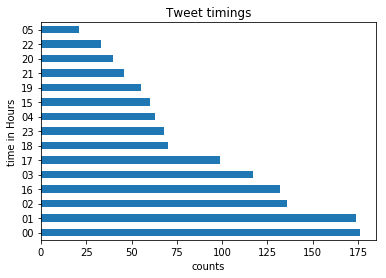

In [120]:
#Create histogram of tweet counts for timings

master_wrd_time_hour = master_wrd.groupby('Hour').filter(lambda x: len(x) >= 20)
master_wrd_time_hour['Hour'].value_counts().plot(kind = 'barh')
plt.title('Tweet timings'), plt.xlabel('counts'), plt.ylabel('time in Hours')

Most people tweet at 12p.m i.e midnight, 1am and 2am.

### Scatter plot of retweets vs favorite count 

Text(0.5,1,' Scatterplot of retweets vs favorites')

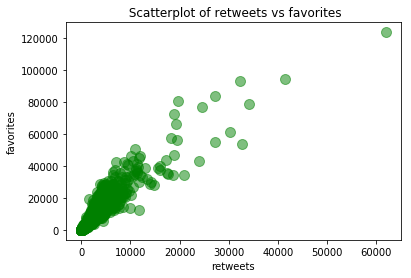

In [121]:
# Libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatterplot between rating numerator and rating denominator to see their trend
master_wrd.plot(kind='scatter', x="retweet_count", y="favorite_count",alpha=0.5, color='green', s=100)
plt.xlabel('retweets'), plt.ylabel('favorites'),
plt.title(' Scatterplot of retweets vs favorites')

We can see a positive corelation between the retweet count and favorites and state that retweet happens to the favorite dog tweets.